#### 공부시간에 따른 점수 예측하기
 - 목표 : 공부시간으로 점수를 예측
 - 데이터셋 : 임의의 생성
 - 피쳐/속성 : 공부시간
 - 타겟/라벨 : 점수
 - 학습방법 : 지도학습 > 회귀
 - 알고리즘 : 선형회귀 <== [조건] 데이터 분포가 선형 분포여야함!

[1] 데이터 준비

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

In [146]:
jumsu = range(7,100,7)
len(jumsu), jumsu[-1]
 
hour = list(range(1,29,2))
len(hour)

14

In [147]:
# List => DataFrame으로 변환
# hourDF = pd.Series(hour).to_frame()
hourDF = pd.DataFrame(hour, columns=['Hour'])

hourDF.head()

jumsuSR = pd.Series(jumsu)
# print(jumsuSR.hj)


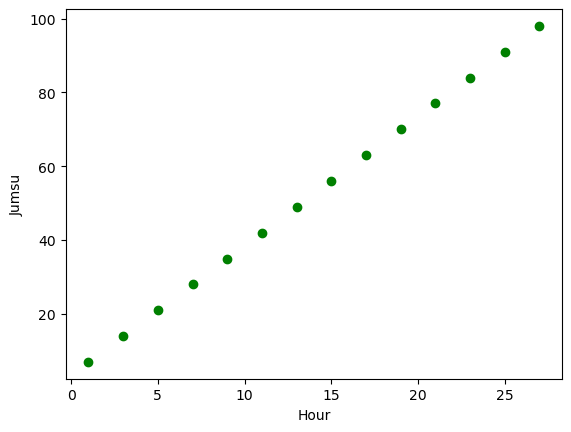

In [148]:
plt.plot(hourDF, jumsuSR, 'go')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.show()

[2] 모델 생성 및 학습 진행

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [151]:
# 학습진행 => 최대한 많은 데이터를 만족하는 직선의 기울기오ㅜㅏ 절편 찾기ㅣ 
model.fit(hourDF, jumsuSR)

LinearRegression()

In [152]:
# 학습 후 모델 파라미터
print(f'기울기 : {model.coef_} 절편 : {model.intercept_}')

기울기 : [3.5] 절편 : 3.499999999999986


In [153]:
# y = ax + b
pre_jumsu = model.coef_[0] * hourDF+ model.intercept_

pre_jumsu = pre_jumsu.values.reshape(-1)    # 1차원화

In [154]:
# 실제 점수와 예측 점수의 차이 확인
real_jumsu = jumsuSR.to_numpy()
real_jumsu - pre_jumsu

array([ 1.33226763e-14,  1.06581410e-14,  1.06581410e-14,  7.10542736e-15,
        7.10542736e-15,  7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.42108547e-14, -1.42108547e-14])

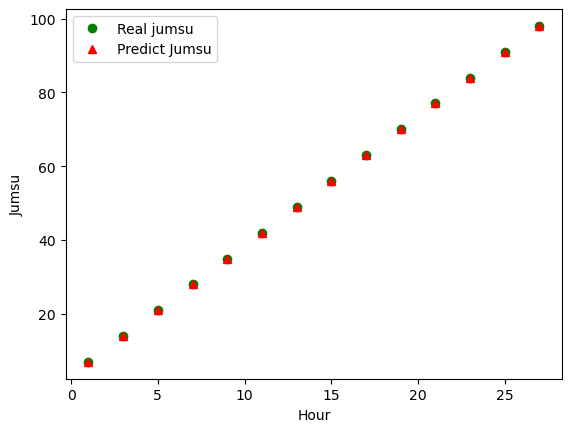

In [155]:
plt.plot(hourDF, jumsuSR, 'go', label = 'Real jumsu')
plt.plot(hourDF, pre_jumsu, 'r^', label='Predict Jumsu')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.legend()
plt.show()

[3] 모델 성능평가

In [156]:
# 학습 모델 인스턴스 생성
model.score(hourDF, jumsuSR)

1.0

In [157]:
### 오차 계산 즉, 손식/비용 함수 확인
# - root_mean_squeared_error 는 v1.4이상 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [158]:
import sklearn

In [159]:
pre_y = model.predict(hourDF)

In [160]:
mse = mean_squared_error(jumsuSR, pre_y)
rmse = mean_squared_error(jumsuSR, pre_y, squared=False)
mae = mean_absolute_error(jumsuSR, pre_y)
r2 = r2_score(jumsuSR, pre_y)

In [161]:
# 손실/비용함수 값은 0에 가까울 수록
## 결정계수 값은 1에 가까울 수록 성능좋은 모델
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 6.857455154671224e-29
rmse : 8.280975277508818e-15
mae : 6.026924990822278e-15
r2 : 1.0


#### 공부시간과 과외횟수에 따른 점수 예측하기
 - 목표 : 공부시간과 과외 횟수가 가지는 패턴/규칙을 찾아서 점수를 예측
 - 데이터셋 : 임의의 생성
 - 피쳐/속성 : 공부시간, 과외횟수
 - 타겟/라벨 : 점수
 - 학습방법 : 지도학습 > 회귀
 - 알고리즘 : 선형회귀 <== [조건] 데이터분포가 선형 분포여야함!

[1] 데이터 준비

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
# 임의의 데이터
hour = [1,3,4,5,7,9,10]
jumsu = [32,55,83,70,99,92,100]
lesson = [0,0,2,1,2,0,1]


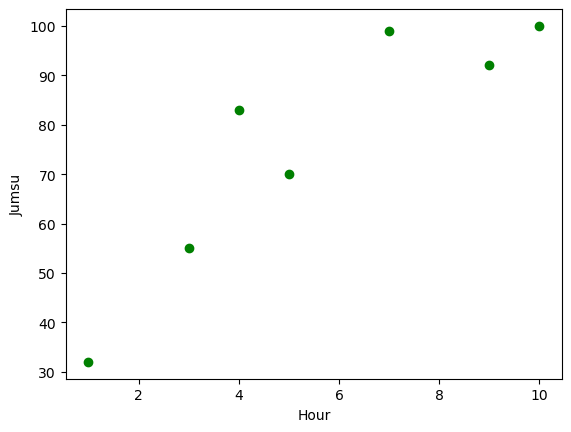

In [164]:
### 현재 데이터의 분포 확인
plt.plot(hour, jumsu, 'go')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.show()

In [165]:
### 학습용 데이터셋 구성 => 피쳐와 타겟
dataDF = pd.DataFrame({'Hour':hour, 'Lesson':lesson})
jumsuSR = pd.Series(jumsu)

[2] 학습 진행 - 다중 선형 회귀

In [166]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression

In [167]:
model = LinearRegression()

model.fit(dataDF, jumsuSR)

LinearRegression()

In [168]:
print(f'model.coef_ : {len(model.coef_)}개, {model.coef_} ')
print(f'model.intercept_ : {model.intercept_}')


model.coef_ : 2개, [ 6.27924892 11.61819933] 
model.intercept_ : 30.914299470389977


[3] 모델 성능 평가

In [169]:
# 모듈 로딩 => 손실 / 비용 함수로 오차 계산, 결정 계수
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [172]:
# 점수 => 내부에서 predict() 진행 ==> 결과로 R2 계수 추출해서 반환
score = model.score(dataDF, jumsuSR)
print(f'score : {score}')

score : 0.9649627963178466


In [171]:
# 성능지표 => 오차계산과 결정 계수 계산
pre_jumsu = model.predict(dataDF)

# 손실/비용 계산 함수 ==> 정답과 예측값
mse = mean_squared_error(jumsuSR, pre_jumsu)
rmse = mean_squared_error(jumsuSR, pre_jumsu, squared=False)
mae = mean_absolute_error(jumsuSR, pre_jumsu)

# 얼마나 정답에 가깝게 값을 예측했느냐를 나타내는 지표, => 정답과 예측값 제공 
r2 = r2_score(jumsuSR, pre_jumsu)